### Seção 1 -  Comandos básicos

Nessa primeira parte iremos ver alguns comandos básicos da biblioteca OpenCV

1. **Leitura da imagem**
2. Capturar vídeo
3. Redimensionar Imagens
4. Desenhar Figuras básicas e Inserir textos
5. Transformações básicas nas imagens
6. Detecção de Contornos

In [1]:
# Bibliotecas
import cv2

### Leitura da imagem

O método **cv2.imread()** carrega uma imagem do arquivo especificado. Se a imagem não pode ser lida (por causa de arquivo ausente, permissões impróprias, formato não suportado ou inválido), este método retorna uma matriz vazia.

**Sintaxe**: $cv2.imread (caminho, flag)$

**Parâmetros**:

**caminho**: uma string que representa o caminho da imagem a ser lida.

**flag**: especifica a forma como a imagem deve ser lida. Seu valor padrão é cv2.IMREAD_COLOR

* cv2.IMREAD_COLOR: Especifica o carregamento de uma imagem colorida. Qualquer transparência da imagem será desprezada. É o flag padrão. Como alternativa, podemos passar o valor inteiro 1 para este sinalizador.
* cv2.IMREAD_GRAYSCALE: Especifica o carregamento de uma imagem em modo de escala de cinza. Como alternativa, podemos passar o valor inteiro 0 para este sinalizador.
* cv2.IMREAD_UNCHANGED: Especifica o carregamento de uma imagem como tal, incluindo o canal alfa. Alternativamente, podemos passar o valor inteiro -1 para este sinalizador.

**Valor de retorno**: este método retorna uma imagem que é carregada do arquivo especificado.

In [16]:
img = cv2.imread('foto_sol.jpg', 1)
cv2.imshow("Imagem Exemplo", img)
cv2.waitKey(0)


-1

UsageError: Line magic function `%inline` not found.


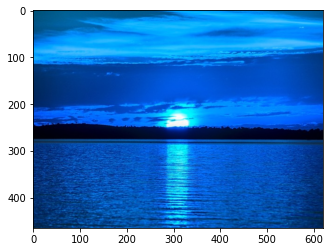

In [15]:
import matplotlib.pyplot as plt
img = cv2.imread("foto_sol.jpg", 1)
plt.imshow(img)

1. Leitura da imagem
2. **Capturar vídeo**
3. Redimensionar Imagens
4. Desenhar Figuras básicas e Inserir textos
5. Transformações básicas nas imagens
6. Detecção de Contornos


###  Capturar vídeo da câmera


Freqüentemente, temos que capturar a transmissão ao vivo com a câmera. O OpenCV fornece uma interface muito simples para isso. Vamos capturar um vídeo da câmera (estou usando a webcam embutida do meu laptop).

Para capturar um vídeo, você precisa criar um objeto **VideoCapture**. Seu argumento pode ser o índice do dispositivo ou o nome de um arquivo de vídeo. O índice do dispositivo é apenas o número para especificar qual câmera. Normalmente, uma câmera será conectada (como no meu caso). Então, simplesmente passo 0 (ou -1). Você pode selecionar a segunda câmera passando 1 e assim por diante. Depois disso, você pode capturar quadro a quadro. Mas no final, não se esqueça de liberar a captura.


**capture.read()** retorna um bool (True / False). Se o quadro for lido corretamente, será True. 



In [3]:
capture = cv2.VideoCapture('video_exemplo.mp4')

while True:
    isTrue, frame = capture.read()
    
    cv2.imshow('Video', frame)
    
    if cv2.waitKey(20) == 27:
        break       

capture.release()
cv2.destroyAllWindows()

1. Leitura da imagem
2. Capturar vídeo
3. **Redimensionar Imagens**
4. Desenhar Figuras básicas e Inserir textos
5. Transformações básicas nas imagens
6. Detecção de Contornos


### Redimensionar imagem

Redimensionar uma imagem significa alterar suas dimensões, seja apenas largura, altura ou ambos. Além disso, a proporção da imagem original pode ser preservada na imagem redimensionada. Para redimensionar uma imagem, OpenCV fornece a função **cv2.resize()**.

**Sintaxe**: $cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])$

**Parâmetros**:

**src**: imagem de entrada

**dsize**: tamanho desejado para a imagem de daisa 

**fx**: Fator de escala ao longo do eixo X

**fy**: Fator de escala ao longo do eixo y

interpolation:

* **INTER_NEAREST** - uma interpolação do vizinho mais próximo 
* **INTER_LINEAR** - uma interpolação bilinear (usada por padrão) 
* **INTER_AREA** - reamostragem usando a relação de área de pixel. Pode ser um método preferido para dizimação de imagem, pois fornece resultados sem moiré. Mas quando a imagem é ampliada, é semelhante ao método INTER_NEAREST. 
* **INTER_CUBIC** - uma interpolação bicúbica na vizinhança de 4 × 4 pixels 
* **INTER_LANCZOS4** - uma interpolação Lanczos na vizinhança de 8 × 8 pixels

In [4]:
def reascaleFrame(frame, scale=0.75):
    width = int(frame.shape[1] * scale)
    heigth = int(frame.shape[0] * scale)
    
    dimensions = (width, heigth)
    
    return cv2.resize(frame, dimensions, interpolation = cv2.INTER_AREA)
    

In [13]:
capture = cv2.VideoCapture(r'C:\Users\megan\Desktop\GithubMeganha\semanaEngenharia\video_exemplo.mp4')

while True:
    isTrue, frame = capture.read()
    frame_resize = reascaleFrame(frame, scale=0.25)
    
    cv2.imshow('Video', frame_resize)
    
    if cv2.waitKey(20) == 27:
        break       

capture.release()
cv2.destroyAllWindows()

1. Leitura da imagem
2. Capturar vídeo
3. Redimensionar Imagens
4. **Desenhar Figuras básicas e Inserir textos**
5. Transformações básicas nas imagens
6. Detecção de Contornos


### Desenhar figura e colocar Texto

Rentângulo

**Sintaxe**: $cv2.rectangle (imagem, pontoinicial, pontofinal, cor, espessura)$

 Parâmetros:
 * **imagem**: É a imagem na qual o retângulo deve ser desenhado.
 * **ponto_inicial**: São as coordenadas iniciais do retângulo. As coordenadas são representadas como tuplas de dois valores, ou seja, (valor da coordenada X, valor da coordenada Y).
 * **ponto_final**: São as coordenadas finais do retângulo. As coordenadas são representadas como tuplas de dois valores, ou seja, (valor da coordenada X, valor da coordenada Y).
 * **cor**: é a cor da linha de borda do retângulo a ser desenhada. Para BGR, passamos uma tupla. por exemplo: (255, 0, 0) para a cor azul.
 * **espessura**: É a espessura da linha da borda do retângulo em px. Espessura de -1 px preencherá a forma do retângulo com a cor especificada.

* **Valor de retorno**: imagem.

Círculo
     
**Sintaxe**: $cv2.circle (imagem, coordenadascentrais, raio, cor, espessura)$

Parâmetros:
* **imagem**: É a imagem na qual o círculo será desenhado.
* **coordenadas_centrais**: São as coordenadas do centro do círculo. As coordenadas são representadas como tuplas de dois valores, ou seja, (valor da coordenada X, valor da coordenada Y).
* **raio**: é o raio do círculo.
* **cor**: é a cor da linha limite do círculo a ser desenhada. Para BGR, passamos uma tupla. por exemplo: (255, 0, 0) para a cor azul.
* **espessura**: É a espessura da linha da borda do círculo em px. Espessura de -1 px preencherá a forma do círculo com a cor especificada.
* **Valor de retorno**:imagem.

Linha
    
**sintaxe**: $cv2.line (imagem, pontoinicial, pontofinal, cor, espessura)$

Parâmetros:
* **imagem**: é a imagem na qual a linha deve ser desenhada.
* **ponto_inicial**: São as coordenadas iniciais da linha. As coordenadas são representadas como tuplas de dois valores, ou seja, (valor da coordenada X, valor da coordenada Y).
* **ponto_final**: São as coordenadas finais da linha. As coordenadas são representadas como tuplas de dois valores, ou seja, (valor da coordenada X, valor da coordenada Y).
* **cor**: é a cor da linha a ser desenhada. Para BGR, passamos uma tupla. por exemplo: (255, 0, 0) para a cor azul.
* **espessura**: é a espessura da linha em px.

* **Valor de retorno**: ele retorna uma imagem.

Texto

**Sintaxe**: $cv2.putText (imagem, texto, org, fonte, fontScale, cor [, espessura [, lineType [, bottomLeftOrigin]]])$

Parâmetros:
* **imagem**: é a imagem na qual o texto será desenhado.
* **texto**: string de texto a ser desenhada.
* **org**: São as coordenadas do canto inferior esquerdo da string de texto na imagem. As coordenadas são representadas como tuplas de dois valores, ou seja, (valor da coordenada X, valor da coordenada Y).
* **fonte**: denota o tipo de fonte. Alguns tipos de fonte são **FONT_HERSHEY_SIMPLEX**, **FONT_HERSHEY_PLAIN**, etc.
* **fontScale**: Fator de escala da fonte que é multiplicado pelo tamanho base específico da fonte.
* **color**: é a cor da string de texto a ser desenhada. Para BGR, passamos uma tupla. por exemplo: (255, 0, 0) para a cor azul.
* **espessura**: é a espessura da linha em px.
* **lineType**: Este é um parâmetro opcional. Fornece o tipo da linha a ser usada.
* **bottomLeftOrigin**: este é um parâmetro opcional. Quando for verdade, a origem dos dados da imagem está no canto inferior esquerdo. Caso contrário, está no canto superior esquerdo.

* **Valor de retorno**: imagem.

In [22]:
import numpy as np


blank = np.zeros((500,500,3), dtype='uint8')

# 1. Pintar a imagem      B G R
blank[200:300, 300:400] = 255,0,0
cv2.imshow('Vermelho', blank)
cv2.waitKey(0)

# 2. Desenhar um retangulo
cv2.rectangle(blank, (0,0), (blank.shape[1]//2, blank.shape[0]//2), (0,255,0), thickness=-1)
cv2.imshow('Rectangle', blank)
cv2.waitKey(0)

# 3. Desenhar um circulo
cv2.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (0,0,255), thickness=-1)
cv2.imshow('Circle', blank)
cv2.waitKey(0)

# 4. Desenhar uma linha
cv2.line(blank, (100,250), (300,400), (255,255,255), thickness=3)
cv2.imshow('Line', blank)
cv2.waitKey(0)

# 5. Escrever um texto
cv2.putText(blank, 'VII Semana da Engenharia!!', (0,400), cv2.FONT_HERSHEY_TRIPLEX, 1.0, (255,255,255), 2)
cv2.imshow('Text', blank)
cv2.waitKey(0)

-1

1. Leitura da imagem
2. Capturar vídeo
3. Redimensionar Imagens
4. Desenhar Figuras básicas e Inserir textos
5. **Transformações básicas nas imagens**
6. Detecção de Contornos


### Transformações básicas na imagem


A Translação é a mudança de localização do objeto. Se você conhece a mudança na direção (x, y), que seja (t_x, t_y), você pode criar a matriz de transformação $\textbf{M}$ da seguinte maneira:


$$M = \begin{bmatrix} 1&0&t_x\\0&1&t_y\end{bmatrix}$$

Você pode transformá-lo em um array Numpy do tipo **np.float32** e passá-lo para a função **cv2.warpAffine()**. 

**Sintaxe**: $cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]] )$

 Parâmetros:
 * **src**: imagem de entrada.
 * **dst** : imagem de saída que tem o tamanho dsize é o mesmo tipo que src.
 * **M**: matriz de transformação.
 * **dsize**: tamanho da imagem de saída.
 * **flags**: combinação de métodos de interpolação. WARP_INVERSE_MAP que significa que M é a transformação inversa (dst-> src).
 * **borderMode**: método de extrapolação de pixel; quando borderMode = BORDER_TRANSPARENT, significa que os pixels na imagem de destino correspondentes aos “outliers” na imagem de origem não são modificados pela função.
 * **borderValue**: valor usado no caso de uma borda constante; por padrão, é 0.
     
**Sintaxe**: $cv2.getRotationMatrix2D(center, angle, scale)$

 Parâmetros:
 * **center**: Centro da rotação da imagem.
 * **angle**: Graus para rotação da imagem
 * **scale**: Escala para rotação



In [27]:
img = cv2.imread('foto_sol.jpg')
cv2.imshow('Park', img)
cv2.waitKey(0)


# Translation
def translate(img, x, y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv2.warpAffine(img, transMat, dimensions)

# -x --> Left
# -y --> Up
# x --> Right
# y --> Down

translated = translate(img, -45, 150)
cv2.imshow('Translated', translated)
cv2.waitKey(0)


# Rotacao
def rotate(img, angle, rotPoint=None):
    (height,width) = img.shape[:2]

    if rotPoint is None:
        rotPoint = (width//2,height//2)
    
    rotMat = cv2.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width,height)

    return cv2.warpAffine(img, rotMat, dimensions)

rotated = rotate(img, -45)
cv2.imshow('Rotated', rotated)
cv2.waitKey(0)


# Flipping
flip = cv2.flip(img, -1)
cv2.imshow('Flip', flip)
cv2.waitKey(0)




-1

1. Leitura da imagem
2. Capturar vídeo
3. Redimensionar Imagens
4. Desenhar Figuras básicas e Inserir textos
5. Transformações básicas nas imagens
6. **Detecção de Contornos**


### Contornos


#### O que é detecção de borda?

A detecção de bordas é uma técnica de processamento de imagem para localizar os limites dos objetos dentro das imagens. Ele funciona detectando descontinuidades no brilho.

#### Onde a detecção de borda é usada?

A detecção de bordas é usada para segmentação de imagens e extração de dados em áreas como processamento de imagens, visão computacional.

### Canny Edge Detection

#### Teoria

Canny Edge Detection é um algoritmo de detecção de bordas popular. Ele foi desenvolvido por John F. Canny em 1986. É um algoritmo de vários estágios e passaremos por cada um deles.

Estágios:

    * Redução de ruídos
    * Gradientes de intensidade da imagem
    * Supressão Non-Maximum
    * Limiar de Histerese
        

#### Redução de ruído

Como a detecção de bordas é suscetível a ruído na imagem, o primeiro passo é remover o ruído da imagem, usando por exemplo um filtro gaussiano 5x5.

#### Encontrando o Gradiente de Intensidade da Imagem

A imagem suavizada é então filtrada com um kernel Sobel nas direções horizontal e vertical para obter a primeira derivada na direção horizontal $(G_x)$ e na direção vertical $(G_y)$. A partir dessas duas imagens, podemos encontrar o gradiente de borda e a direção de cada pixel da seguinte maneira:

$$Edge\_Gradient\;(G)=\sqrt{G_x ^ 2 + G_y ^ 2}$$ 
$$Angle\;(\theta) = \tan^{- 1}\bigg(\frac{G_y} {G_x}\bigg)$$

A direção do gradiente é sempre perpendicular às arestas. É arredondado em um dos quatro ângulos que representam as direções vertical, horizontal e duas diagonais.

#### Supressão Non-Maximum

Depois de obter a magnitude e a direção do gradiente, uma varredura completa da imagem é feita para remover quaisquer pixels indesejados que possam não constituir a borda. Para isso, a cada pixel, o pixel é verificado se é um máximo local em sua vizinhança na direção do gradiente. Confira a imagem abaixo:

![Supressão Non-Maximum](nms.jpg)


O ponto A está na borda (na direção vertical). A direção do gradiente é normal para a borda. Os pontos B e C estão em direções gradientes. Portanto, o ponto A é verificado com os pontos B e C para ver se ele forma um máximo local. Em caso afirmativo, é considerado para o próximo estágio, caso contrário, é suprimido (colocado em zero).

Resumindo, o resultado que você obtém é uma imagem binária com “bordas finas”.

#### Limiar de Histerese

Este estágio decide quais arestas são realmente arestas e quais não são. Para isso, precisamos de dois valores de limite, **minVal** e **maxVal**. Quaisquer arestas com gradiente de intensidade maior que maxVal certamente são arestas e aquelas abaixo de minVal certamente não são arestas, portanto, descartadas. Aqueles que se encontram entre esses dois limites são classificados como bordas ou não com base em sua conectividade. Se eles estiverem conectados a pixels de “arestas seguras”, eles serão considerados parte das arestas. Caso contrário, eles também são descartados. Veja a imagem abaixo:

![Histerese](hysteresis.jpg)

A aresta A está acima de maxVal, portanto considerada “aresta segura”. Embora a aresta C esteja abaixo de maxVal, ela está conectada à aresta A, de modo que também é considerada uma aresta válida e obtemos essa curva completa. Mas a aresta B, embora esteja acima de minVal e esteja na mesma região da aresta C, ela não está conectada a nenhuma “aresta segura”, de modo que é descartada. Portanto, é muito importante selecionar minVal e maxVal de acordo para obter o resultado correto.

Este estágio também remove pequenos ruídos de pixels na suposição de que as bordas são linhas longas.

Então, o que finalmente conseguimos são bordas fortes na imagem.

#### Redução de ruído

In [6]:
import cv2


img = cv2.imread('foto_sol.jpg')


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray', gray)
cv2.waitKey(0)


blur = cv2.GaussianBlur(gray, (5,5), cv2.BORDER_DEFAULT)
cv2.imshow('Blur', blur)
cv2.waitKey(0)


canny = cv2.Canny(gray, 100, 200)
cv2.imshow('Canny Edges', canny)
cv2.waitKey(0)

-1

In [32]:
blur = cv2.GaussianBlur(gray, (5,5), cv2.BORDER_DEFAULT)
cv2.imshow('Blur', blur)
cv2.waitKey(0)


-1

In [3]:
canny = cv2.Canny(blur, 100, 200)
cv2.imshow('Canny Edges', canny)
cv2.waitKey(0)

-1